# import modules 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# helper functions (if needed)

In [10]:
# python code...

# read data file into pandas dataframe

In [3]:
df = pd.read_csv('mystery.csv', header=None, delimiter='\t')
print(df)

         0      1       2      3      4      5      6
0    14.29  14.09  0.9050  5.291  3.337  2.699  4.825
1    12.13  13.73  0.8081  5.394  2.745  4.825  5.220
2    11.19  13.05  0.8253  5.250  2.675  5.813  5.219
3    10.59  12.41  0.8648  4.899  2.787  4.975  4.794
4    11.02  13.00  0.8189  5.325  2.701  6.735  5.163
..     ...    ...     ...    ...    ...    ...    ...
205  14.59  14.28  0.8993  5.351  3.333  4.185  4.781
206  14.01  14.29  0.8625  5.609  3.158  2.217  5.132
207  14.43  14.40  0.8751  5.585  3.272  3.975  5.144
208  11.82  13.40  0.8274  5.314  2.777  4.471  5.178
209  14.69  14.49  0.8799  5.563  3.259  3.586  5.219

[210 rows x 7 columns]


# experiment w/ clustering algorithms & parameters

In [4]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)
print(sse)

[2719.8524101779526, 1011.6122645866976, 587.3186115940427, 471.4983093895863, 385.50729234904384, 323.3451017086921, 277.53471658879107, 240.5667293168427, 216.19457263396333, 200.47062136637896]


# visualize nClusters vs. SSE

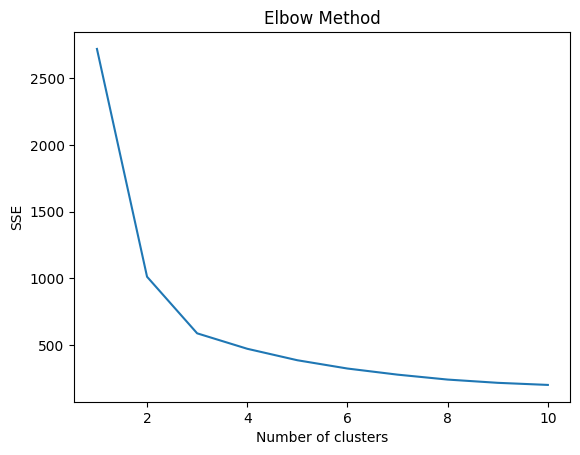

In [5]:
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# QUESTION: How many clusters are there? Why?

There are 10 Clusters. Because for the elbow method to produce readable information, it needs more than one through three. ALowing the graph to grab more data and produce more of a graph to show how many clusters are good enough to allow for more of an efficient dotted graph.

# run "best" clustering algorithm on data

In [9]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df)
print(pred_y)

[2 0 0 0 0 1 2 2 2 0 1 2 2 0 0 2 0 0 0 0 2 1 0 0 1 2 2 2 2 2 0 0 0 1 2 2 1
 1 2 1 1 0 1 2 0 2 1 1 1 0 0 2 0 0 1 0 2 2 2 2 1 0 2 1 2 1 2 1 1 0 1 2 2 2
 1 0 1 2 1 0 0 1 0 1 0 0 0 1 0 1 1 0 2 0 0 2 2 0 2 1 1 2 0 2 0 1 2 2 0 2 0
 0 0 1 2 2 0 2 1 1 0 0 1 0 0 0 0 1 2 1 2 0 2 1 0 2 2 0 1 2 1 1 0 1 2 1 0 0
 0 2 1 2 2 1 0 1 0 1 0 1 1 1 0 0 1 1 0 2 1 2 1 0 1 2 0 0 0 2 2 1 2 2 0 1 0
 1 2 1 0 2 0 2 0 2 2 2 2 0 2 0 0 0 1 2 1 2 2 2 0 2]


# visualize clustered data 

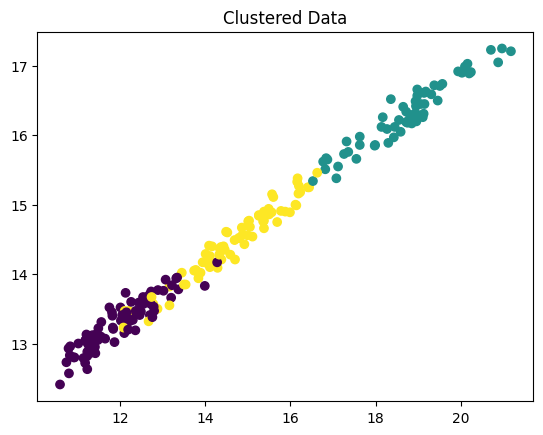

In [7]:
plt.scatter(df[0], df[1], c=pred_y)
plt.title('Clustered Data')
plt.show()

# write labeled data to \<YourLastName>.csv

In [8]:
labeled_df = pd.concat([df, pd.DataFrame(pred_y)], axis=1)
labeled_df.to_csv("Rakowicz.csv", sep="\t", header=False, index=False)